In [20]:
import pandas as pd
import os

In [21]:


# Set paths
base_path = r"C:\Users\P095382\Documents\thesis_project\Data\CamCAN\dataman\useraccess\processed\Szabolcs_David_2442"
approved_data_path = os.path.join(base_path, "approved_data.tsv")
standard_data_path = os.path.join(base_path, "standard_data.csv")

# Load data
approved_df = pd.read_csv(approved_data_path, sep='\t')
standard_df = pd.read_csv(standard_data_path)


filtered_df = standard_df[standard_df['CCID'].isin(approved_df['CCID'])]

# Display the filtered dataframe
df = filtered_df

df
# Now you can analyze the data
# df.describe() - for summary statistics
# df.info() - for data types and non-null values
# etc.

,CCID,Age,Sex,Hand,Yrs Education,Coil,MT_TR
0,CC110019,20.25,FEMALE,100.0,13,NaN,NaN
1,CC110033,24.17,MALE,90.0,16,after,30.0
2,CC110037,18.75,MALE,89.0,13,before,30.0
3,CC110038,28.00,FEMALE,70.0,18,NaN,NaN
4,CC110045,24.50,FEMALE,100.0,18,before,30.0
...,...,...,...,...,...,...,...
2676,CC821061,92.83,MALE,100.0,16,NaN,NaN
2677,CC821077,94.33,MALE,100.0,11,NaN,NaN
2678,CC821078,91.67,FEMALE,999.0,11,NaN,NaN
2679,CC821083,89.75,MALE,100.0,11,NaN,NaN


Number of approved subjects: CCID             2681
Age              2681
Sex              2681
Hand             2676
Yrs Education    2654
Coil              657
MT_TR             617
dtype: int64
Unique CCIDs: 2681


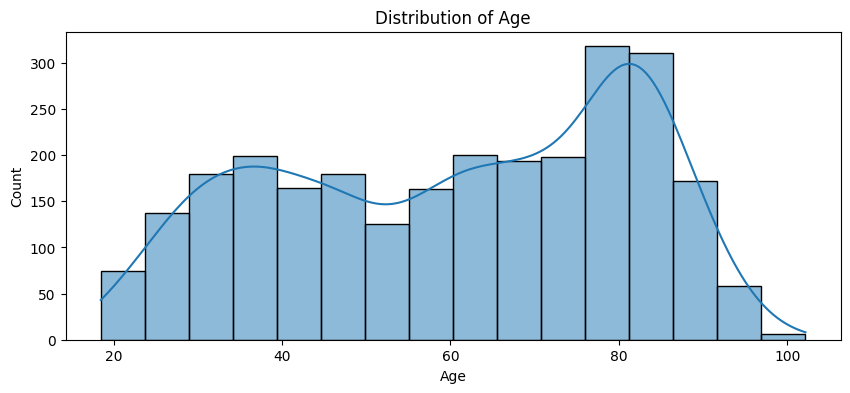

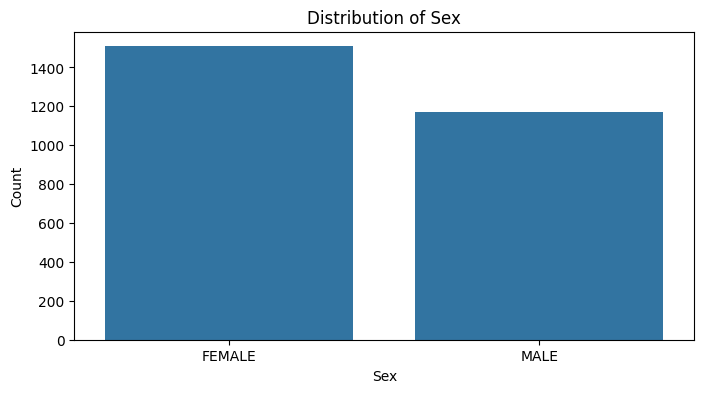

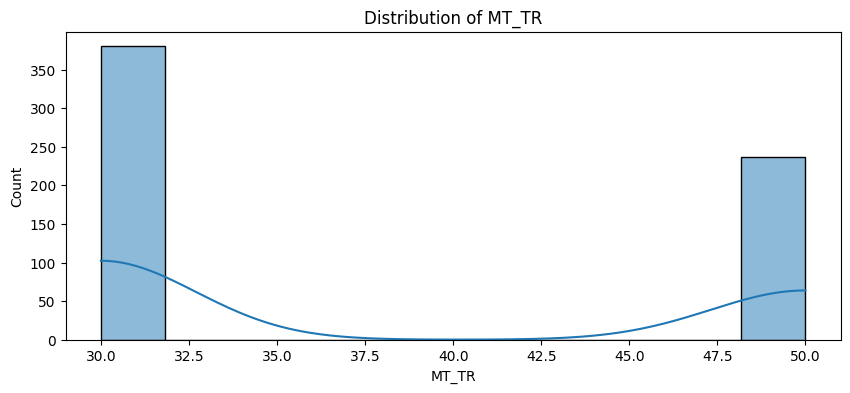

Age distribution summary:
count    2681.000000
mean       60.569403
std        20.929924
min        18.500000
25%        41.670000
50%        63.420000
75%        79.670000
max       102.170000
Name: Age, dtype: float64

Sex distribution counts:
Sex
FEMALE    1508
MALE      1173
Name: count, dtype: int64

MT_TR distribution summary:
count    617.000000
mean      37.682334
std        9.735607
min       30.000000
25%       30.000000
50%       30.000000
75%       50.000000
max       50.000000
Name: MT_TR, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set paths
base_path = r"C:\Users\P095382\Documents\thesis_project\Data\CamCAN\dataman\useraccess\processed\Szabolcs_David_2442"
approved_data_path = os.path.join(base_path, "approved_data.tsv")
standard_data_path = os.path.join(base_path, "standard_data.csv")

# Load data
approved_df = pd.read_csv(approved_data_path, sep='\t') 
standard_df = pd.read_csv(standard_data_path)

# Filter standard_df to include only the approved subjects
filtered_df = standard_df[standard_df['CCID'].isin(approved_df['CCID'])]
df = filtered_df

print("Number of approved subjects:", df.count())
unique_ccids = df['CCID'].unique()
print("Unique CCIDs:", len(unique_ccids))

# Age distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

# Sex distribution
plt.figure(figsize=(8, 4))
sex_counts = df['Sex'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('Distribution of Sex')
plt.ylabel('Count')
plt.show()

# MT_TR distribution
plt.figure(figsize=(10, 4))
# Drop NaN values for visualization
mt_tr_data = df['MT_TR'].dropna()
sns.histplot(mt_tr_data, kde=True)
plt.title('Distribution of MT_TR')
plt.xlabel('MT_TR')
plt.show()

# Print summary statistics
print("Age distribution summary:")
print(df['Age'].describe())

print("\nSex distribution counts:")
print(df['Sex'].value_counts())

print("\nMT_TR distribution summary:")
print(df['MT_TR'].describe())